In [1]:
# Install required libraries
# Enforcing a specific, known-compatible version of PEFT
!pip install -q transformers sentence-transformers accelerate pandas tqdm matplotlib
!pip install peft==0.10.0

# IMPORTANT: After running this cell, go to the Colab Menu:
# Runtime -> Restart session
# (You do not need to re-run the install cell after the restart)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 14.8 MB/s eta 0:00:00
  Attempting uninstall: peft
    Found existing installation: peft 0.18.0
    Uninstalling peft-0.18.0:
      Successfully uninstalled peft-0.18.0


In [2]:
# Update the tokenizers library
!pip install -U tokenizers

# Update the transformers library
!pip install -U transformers

In [10]:
# Execute the compute_metrics.py script again (assuming this script wraps the baseline and attack runs)
!python compute_metrics.py \
    --csv job_reasoning_questions.csv \
    --base results_baseline.csv \
    --attack results_overthink.csv \
    --plots Plots

# If you were running the commands directly, they would be:
# !python job_reasoning_eval.py --csv job_reasoning_questions.csv --out results_baseline.csv
# !python job_reasoning_eval.py --csv job_reasoning_questions.csv --out results_overthink.csv --attack --attack-variant sudoku

usage: compute_metrics.py [-h] [--base BASE] [--sudoku SUDOKU] [--mdp MDP]
                          [--out OUT] [--plots PLOTS]
compute_metrics.py: error: unrecognized arguments: --csv job_reasoning_questions.csv --attack results_overthink.csv


In [5]:
# Run this command in your environment first
!pip install bitsandbytes accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 MB 45.4 MB/s eta 0:00:00


In [9]:
print("\n--- Running Filtering Defense (Sudoku + MDP) ---")
!python defense_filtering_eval_both.py \
    --csv job_reasoning_questions.csv \
    --out-prefix results_filtering \
    --attack-variant both


--- Running Filtering Defense (Sudoku + MDP) ---
2025-11-23 01:41:03.894553: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763862063.914303    9818 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763862063.920326    9818 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763862063.935239    9818 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763862063.935268    9818 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763862063.935270    9818

In [11]:
print("\n--- Running MDP Filtering Defense ---")
!python filtering_defense_mdp.py \
    --csv job_reasoning_questions.csv \
    --out results_filtering_mdp.csv \
    --limit 8


--- Running MDP Filtering Defense ---
2025-11-23 02:49:46.347167: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763866186.367806   26755 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763866186.373906   26755 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763866186.389749   26755 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763866186.389774   26755 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763866186.389777   26755 computatio


--- Generating MDP Filtering Defense Plot ---
[OK] Wrote MDP filtering defense plot to Plots/defense_mdp_filter.png


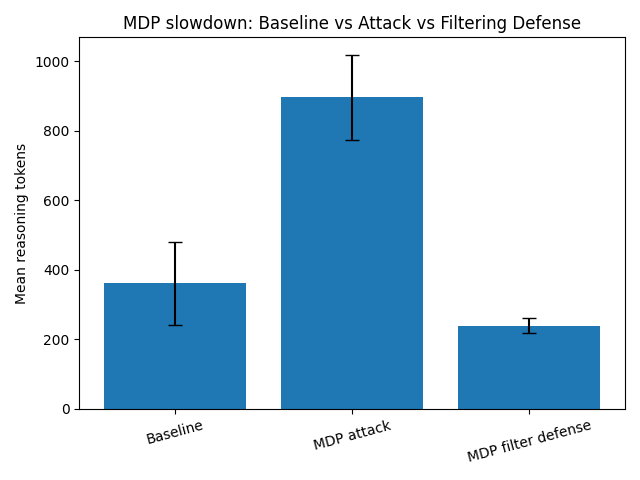

In [14]:
!mkdir -p Plots

print("\n--- Generating MDP Filtering Defense Plot ---")
!python plot_mdp_filtering_defense.py \
    --base results_baseline.csv \
    --mdp-attack results_mdp.csv \
    --mdp-filter results_filtering_mdp.csv \
    --outdir Plots

from IPython.display import Image
Image('Plots/defense_mdp_filter.png')